In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mtcars.csv')

In [3]:
df.head(5)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.tail(5)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [5]:
df.shape

(32, 12)

In [6]:
df.rename(columns={'Unnamed: 0':'Name'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [8]:
df.dtypes

Name     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [9]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [10]:
print(df['gear'].unique())
print("종류:",df['gear'].nunique())

[4 3 5]
종류: 3


In [11]:
print(df['am'].unique())
print("종류:",df['am'].nunique())

[1 0]
종류: 2


### Gear X Transmission Plot

**Crosstab 활용하기**

In [12]:
gear_am = pd.crosstab(index=df['gear'], columns=df['am'])
gear_am

am,0,1
gear,,
3,15,0
4,4,8
5,0,5


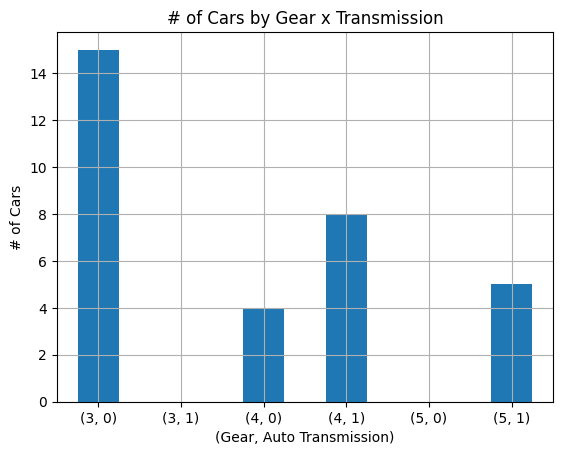

In [13]:
gear_am.stack().plot(kind='bar', grid=True)
plt.xticks(rotation=0)
plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars');

**Crosstab 이외의 방법 - groupy + MultiIndex + reindex**

In [14]:
gear_am_2 = df.groupby(['gear','am']).size()
gear_am_2

gear  am
3     0     15
4     0      4
      1      8
5     1      5
dtype: int64

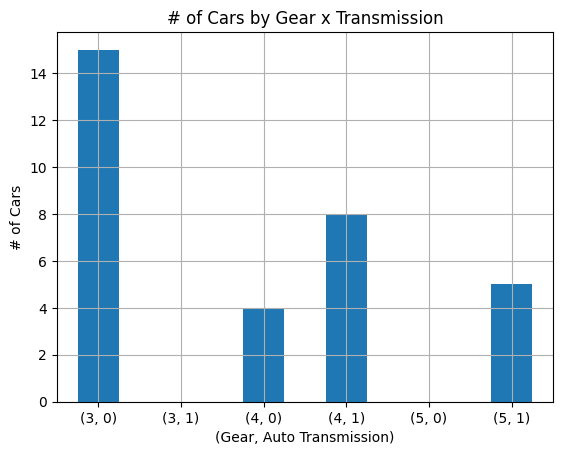

In [83]:
types = pd.MultiIndex.from_product([df['gear'].unique(), df['am'].unique()])
gear_am_2 = gear_am_2.reindex(types, fill_value=0)
gear_am_2.sort_index(level=0).plot(kind='bar')
plt.grid()
plt.xticks(rotation=0)
plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars');

**Crosstab 이외의 방법 - pivot_table**

In [88]:
gear_am_pivot = df.pivot_table(index='gear', columns='am', aggfunc='size', fill_value=0)
gear_am_pivot

am,0,1
gear,,
3,15,0
4,4,8
5,0,5


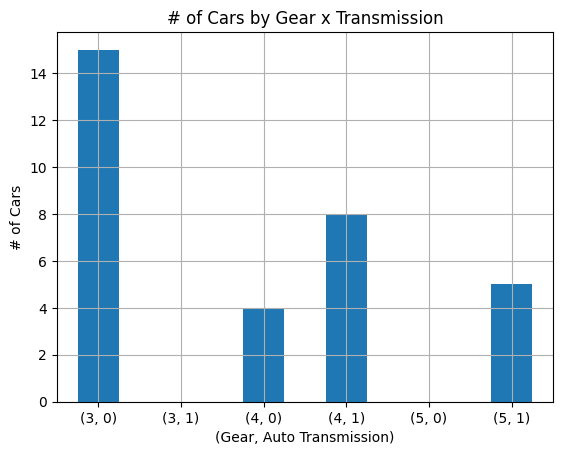

In [90]:
gear_am_pivot.stack().plot(kind='bar')
plt.grid()
plt.xticks(rotation=0)
plt.title('# of Cars by Gear x Transmission')
plt.xlabel('(Gear, Auto Transmission)')
plt.ylabel('# of Cars');

### 모든 Feature 히스토그램

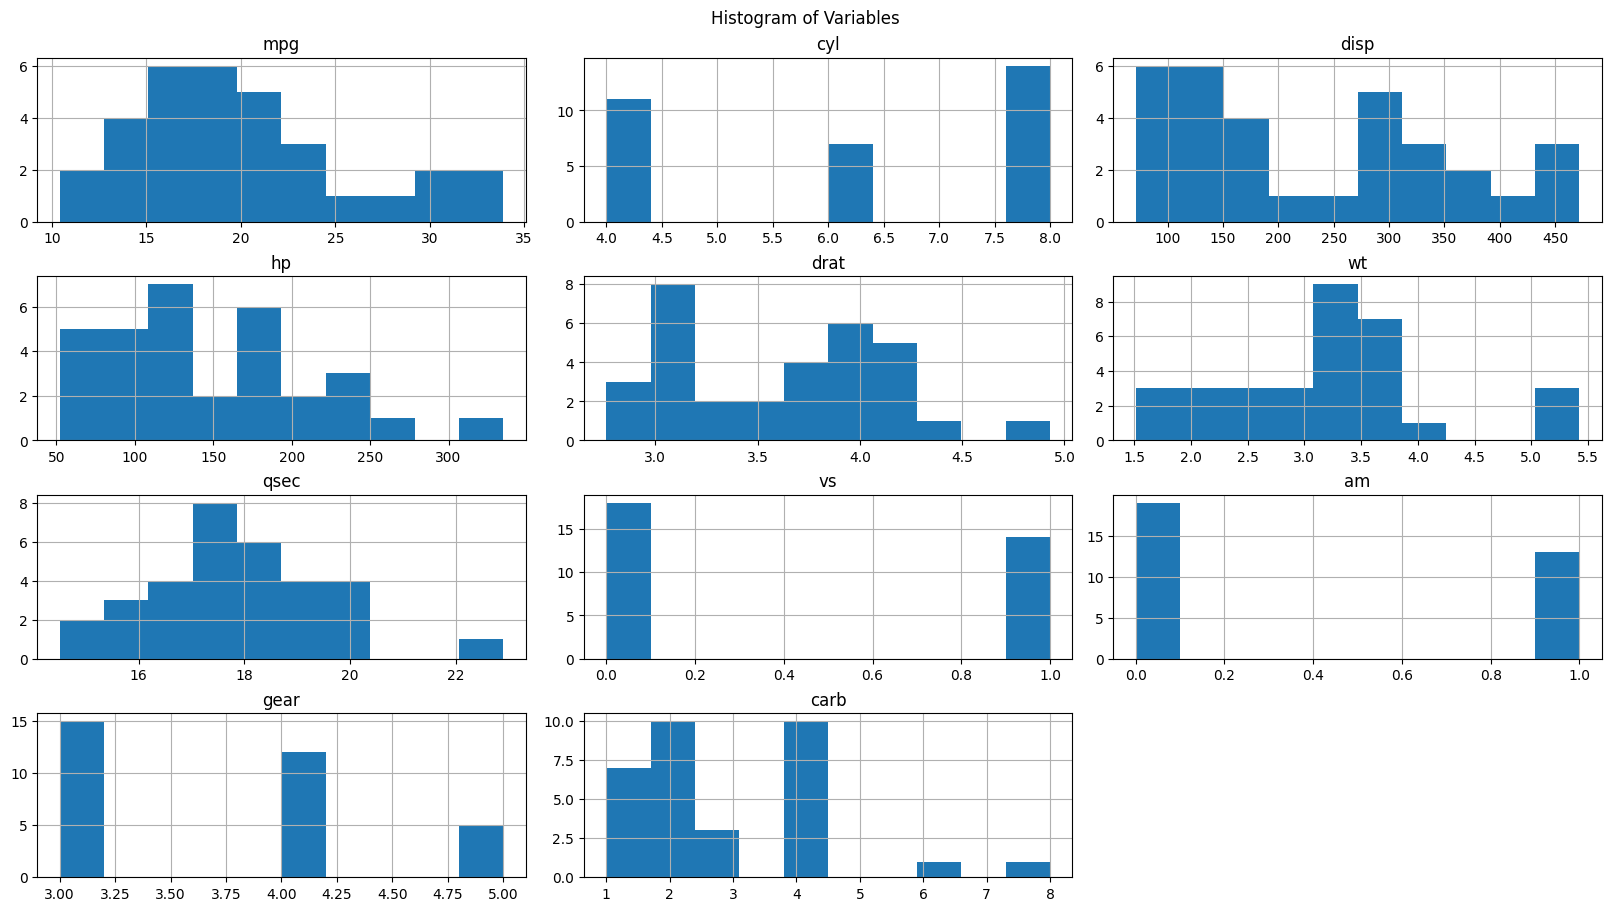

In [91]:
fig, ax = plt.subplots(4,3, figsize=(16, 9), constrained_layout=True)
fig.suptitle('Histogram of Variables')
col_idx = 0
for i in range(4):
    for j in range(3):
        col_idx += 1
        if col_idx >= 12:
            ax[i, j].set_visible(False)
            break
        ax[i, j].hist(df[df.columns[col_idx]])
        ax[i, j].grid()
        ax[i, j].set_title(df.columns[col_idx])

### Scatter 차트

Text(0.5, 1.0, 'Cylinder vs Horse Power')

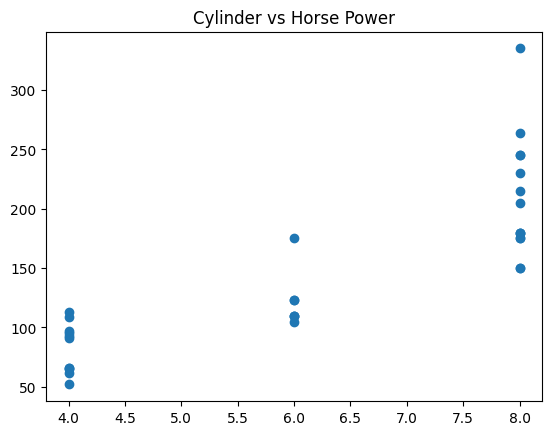

In [100]:
plt.scatter(df['cyl'], df['hp'])
plt.title('Cylinder vs Horse Power')

Text(0.5, 1.0, 'MPG vs Horse Power')

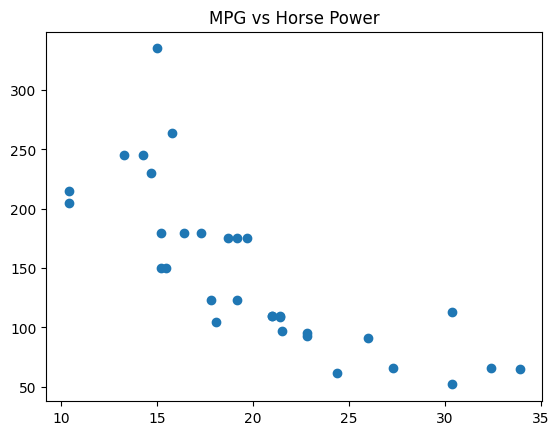

In [101]:
plt.scatter(df['mpg'], df['hp'])
plt.title('MPG vs Horse Power')

### 상관계수 출력

In [108]:
df.loc[:,df.columns != 'Name'].corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


### 팀 활동

* **이런 데이터셋을 분석해서 얻을 수 있는 경제적 가치는 무엇일까요? 어떤 비즈니스 상황에서 이런 데이터셋을 분석해서 어떤 경제적 가치를 얻을 수 있을까요?**
    * 주수민
        * 차량 성능을 개선하기 위한 방향성을 찾을 수 있다
        * 차량을 개발하기전에 성능을 예측해 볼 수 있다
        * 소비자가 원하는 차량을 쉽게 찾을 수 있는 서비스 제공가능(다나와 같은..)
    * 김태현
        * 실제 차량 판매량을 해당 데이터셋에 추가하면
             (1) 차량 판매량과 각 attribute의 상관 관계를 구해 일반적인 소비자들이 차량을 구매할 때 어떤 attribute를 중점적으로 고려하는지 알 수 있음
             (2) 차량 판매량과 대당 순이익을 곱해 각 attribute와 상관 관계를 구하면 어떤 attribute를 중점적으로 중요하게 설계하는지에 따라 기업 입장에서 이익이 되는지 알 수 있음
        * Histograms of Variables를 통해 시장에서 유통되는 차량들의 attribute가 어떤 경향성을 띄는 지 알 수 있고, 이를 통해 기업 입장에서 틈새 시장을 파악할 수 있음
            * → (PB 브랜드같은거 런칭 하는 느낌으로 틈새시장? 좋은 것 같습니다.)
    * 최민제
        * 차량을 제작하여서 판매하는 회사의 경우, 직접 제작하여 측정해보지 않는 이상 확인하기 어려운 지표들이 존재할 것이다. 기본적으로, 연비나 가속 성능의 경우, 여러가지 실질적인 요인에 의해서 정해지기 때문에 처음부터 지표를 설정하기 어려울 것이다.
        * 그러므로, 이러한 데이터들을 이용하여 직접 운용하기 전 설계 과정부터 직접 차체를 제작하지 않고도 성능을 예측하도록 한다면, 제작비용이 절약되는 경제적인 효과가 있을 것으로 예상된다.
            * → 데이터 셋을 참고하면 좀 더 다른 정보들을 구하기 쉽지 않을까 생각된다.

* **변수들 간의 상관 관계가 높은 조합을 임의로 2개 선택해서 해당 데이터 간의 상관 관계를 그래프로 그리고 어떤 결론을 내릴 수 있는지를 토의하세요.**
    * vs와 qsec에 대해서 비교.

        1. vs는 엔진의 형태에 관한 요소이다. 
            직렬엔진의 경우 실린더가 일직선상에 배치되기 때문에 차지하는 넓어 무게중심이 높아지게 된다. 때문에 주행안정성이 떨어져 이와 관련된 qsec(1/4 mile 도달 시간)이 증가하게 된다. 
            반면, V자 엔진의 경우 실린더가 V 형상으로 배치되기 때문에 차지하는 공간이 좁아져 무게중심이 낮아지므로 qsec이 감소하게 된다.
            상관계수에서 음의 값을 가지는 것을 보면 이를 확인 할 수 있다.



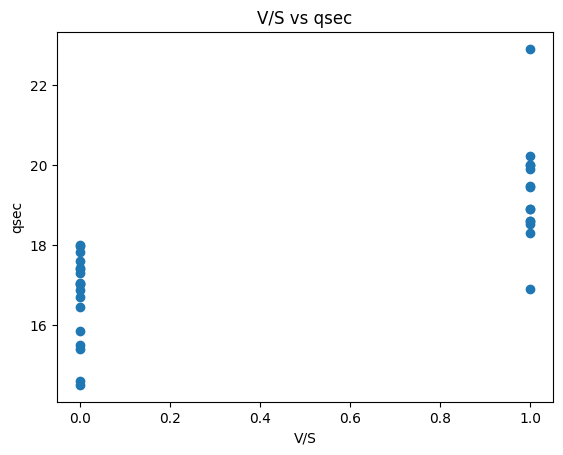

In [35]:
plt.scatter(df['vs'], df['qsec'])
plt.xlabel('V/S')
plt.ylabel('qsec')
plt.title('V/S vs qsec');

- drat은 기어비, wt는 차량 중량이다.   
 drat과 wt가 음의 상관관계로 큰 연관성을 가지기에 기어비가 높으면 무게가 낮을 것이라고 생각하고 조사한 결과, 기어비가 높은 경우 토크가 강해져 가벼운 차량에 추진력을 더할 때 유리하고, 기어비가 낮은 경우 마력이 강해져 무거운 차량을 움직이기에 유리하였다.   
 따라서 기어비에 의해 무게가 반비례로 결정되는 것이 아닌 차량의 중량이 무거운 경우 낮은 기어비를 택하고, 차량이 가벼운 경우 높은 기어비를 택하는 경향성이 나타났다.

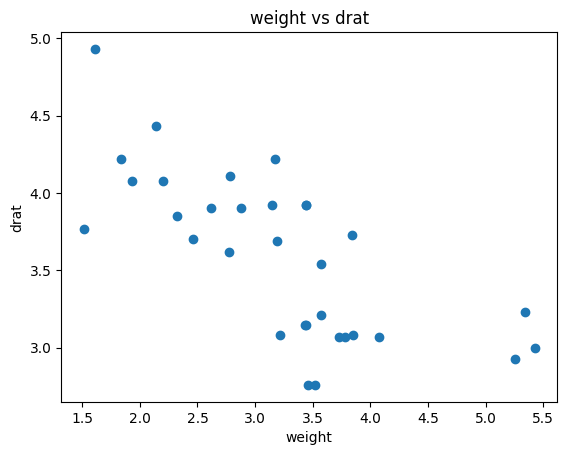

In [36]:
plt.scatter(df['wt'], df['drat'])
plt.xlabel('weight')
plt.ylabel('drat')
plt.title('weight vs drat');